In [2]:
!pip3 install euroleague_api
from euroleague_api.shot_data import ShotData


Defaulting to user installation because normal site-packages is not writeable
  Using cached xmltodict-0.14.2-py2.py3-none-any.whl.metadata (8.0 kB)
Using cached xmltodict-0.14.2-py2.py3-none-any.whl (10.0 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [58]:
shot = ShotData()
df= ShotData.get_game_shot_data_multiple_seasons(start_season=2016,end_season=2017,self=shot)

Season loop:   0%|          | 0/2 [00:00<?, ?it/s]

Season 2016:   0%|          | 0/259 [00:00<?, ?it/s]

Season 2017:   0%|          | 0/260 [00:00<?, ?it/s]

In [59]:
df.to_csv('euroleague2022.csv')

In [12]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('euroleague2022.csv')

In [3]:
df.head()

,Unnamed: 0,Season,Phase,Round,Gamecode,NUM_ANOT,TEAM,ID_PLAYER,PLAYER,ID_ACTION,...,COORD_Y,ZONE,FASTBREAK,SECOND_CHANCE,POINTS_OFF_TURNOVER,MINUTE,CONSOLE,POINTS_A,POINTS_B,UTC
0,0,2016,RS,1,1,8,RED,P004863,"JOVIC, STEFAN",2FGM,...,388,F,0,0,0,1,09:45,2,0,20161013190108
1,1,2016,RS,1,1,9,DAR,P000436,"BERTANS, DAIRIS",2FGM,...,75,C,0,0,0,1,09:34,2,2,20161013190120
2,2,2016,RS,1,1,17,DAR,P000436,"BERTANS, DAIRIS",2FGAB,...,131,C,0,0,0,1,09:02,2,2,20161013190233
3,3,2016,RS,1,1,21,DAR,P001833,"MOERMAN, ADRIEN",2FGM,...,62,B,0,1,0,2,08:53,2,4,20161013190237
4,4,2016,RS,1,1,22,RED,P005942,"DANGUBIC, NEMANJA",2FGA,...,12,C,0,0,0,2,08:42,2,4,20161013190248


In [4]:
df = df[df['PLAYER'] == 'DONCIC, LUKA']

In [5]:
df.head()

,Unnamed: 0,Season,Phase,Round,Gamecode,NUM_ANOT,TEAM,ID_PLAYER,PLAYER,ID_ACTION,...,COORD_Y,ZONE,FASTBREAK,SECOND_CHANCE,POINTS_OFF_TURNOVER,MINUTE,CONSOLE,POINTS_A,POINTS_B,UTC
502,502,2016,RS,1,4,124,MAD,P005929,"DONCIC, LUKA",2FGA,...,156,D,0,0,0,11,09:36,24,17,20161012192335
511,511,2016,RS,1,4,155,MAD,P005929,"DONCIC, LUKA",3FGM,...,420,I,0,0,0,13,07:04,31,23,20161012192825
521,521,2016,RS,1,4,189,MAD,P005929,"DONCIC, LUKA",3FGA,...,796,I,0,0,0,16,04:37,35,32,20161012193417
578,578,2016,RS,1,4,397,MAD,P005929,"DONCIC, LUKA",FTM,...,-1,,0,1,0,30,00:56,59,53,20161012201822
579,579,2016,RS,1,4,398,MAD,P005929,"DONCIC, LUKA",FTM,...,-1,,0,1,0,30,00:56,60,53,20161012201834


In [6]:
df.shape

(767, 23)

In [7]:
df['PLAYER'].unique()

array(['DONCIC, LUKA'], dtype=object)

In [8]:
df['POINT_DIF'] = df['POINTS_A']-df['POINTS_B']

In [9]:
df['POINT_DIF'].max()

31

In [10]:
df['POINT_DIF'].min()

-46

In [13]:
df['SHOT_DISTANCE'] = np.sqrt((df['COORD_X']**2) + (df['COORD_Y']**2))

In [14]:
df['SHOT_DISTANCE'] = df['SHOT_DISTANCE']/30.48

In [15]:
df.columns

Index(['Unnamed: 0', 'Season', 'Phase', 'Round', 'Gamecode', 'NUM_ANOT',
       'TEAM', 'ID_PLAYER', 'PLAYER', 'ID_ACTION', 'ACTION', 'POINTS',
       'COORD_X', 'COORD_Y', 'ZONE', 'FASTBREAK', 'SECOND_CHANCE',
       'POINTS_OFF_TURNOVER', 'MINUTE', 'CONSOLE', 'POINTS_A', 'POINTS_B',
       'UTC', 'POINT_DIF', 'SHOT_DISTANCE'],
      dtype='object')

In [16]:
df['ACTION'].value_counts()

ACTION
Free Throw In           225
Missed Three Pointer    182
Two Pointer             145
Missed Two Pointer      119
Three Pointer            96
Name: count, dtype: int64

In [17]:
import numpy as np 
df['SHOT_MADE_FLAG'] = np.where((df['ACTION'] == 'Two Pointer') | (df['ACTION'] == 'Three Pointer'),1,0)

In [18]:
df.head()

,Unnamed: 0,Season,Phase,Round,Gamecode,NUM_ANOT,TEAM,ID_PLAYER,PLAYER,ID_ACTION,...,SECOND_CHANCE,POINTS_OFF_TURNOVER,MINUTE,CONSOLE,POINTS_A,POINTS_B,UTC,POINT_DIF,SHOT_DISTANCE,SHOT_MADE_FLAG
502,502,2016,RS,1,4,124,MAD,P005929,"DONCIC, LUKA",2FGA,...,0,0,11,09:36,24,17,20161012192335,7,8.503960,0
511,511,2016,RS,1,4,155,MAD,P005929,"DONCIC, LUKA",3FGM,...,0,0,13,07:04,31,23,20161012192825,8,25.279845,1
521,521,2016,RS,1,4,189,MAD,P005929,"DONCIC, LUKA",3FGA,...,0,0,16,04:37,35,32,20161012193417,3,26.153563,0
578,578,2016,RS,1,4,397,MAD,P005929,"DONCIC, LUKA",FTM,...,1,0,30,00:56,59,53,20161012201822,6,0.046398,0
579,579,2016,RS,1,4,398,MAD,P005929,"DONCIC, LUKA",FTM,...,1,0,30,00:56,60,53,20161012201834,7,0.046398,0


In [19]:
df[df['ACTION'] != 'Free Throw In'].groupby('Phase')['SHOT_MADE_FLAG'].mean().reset_index()

,Phase,SHOT_MADE_FLAG
0,FF,0.241379
1,PO,0.360000
2,RS,0.466523


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='POINT_DIF', ylabel='Count'>

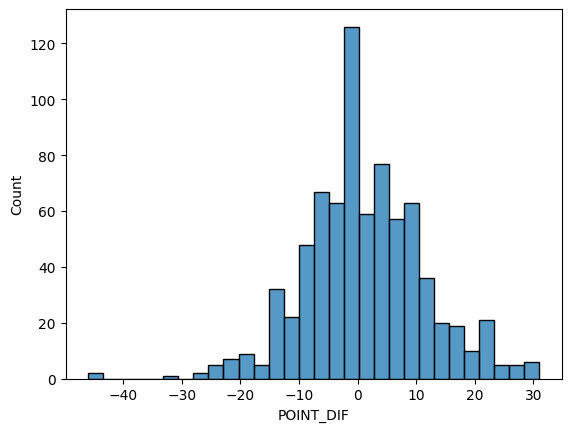

In [21]:
sns.histplot(data=df,x='POINT_DIF')

In [22]:
df['Gamecode'].nunique()

63

In [25]:
df.groupby(['Season','Gamecode'])['POINTS'].sum().reset_index().sort_values(by='POINTS',ascending=False).head(10)

,Season,Gamecode,POINTS
45,2017,88,33
38,2017,28,28
37,2017,20,27
35,2017,1,27
56,2017,175,27
60,2017,229,24
55,2017,162,21
44,2017,80,20
49,2017,113,20
40,2017,44,19


<Axes: xlabel='Gamecode', ylabel='POINTS'>

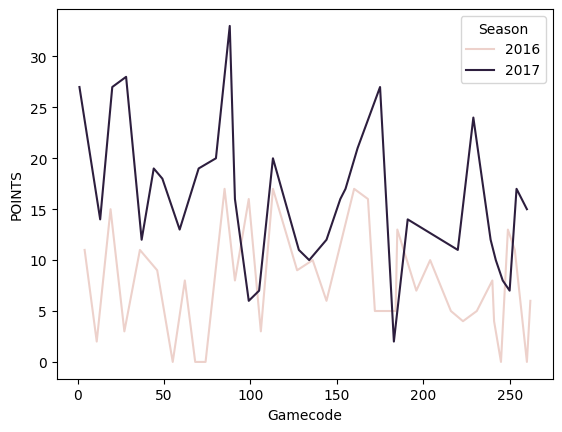

In [26]:
sns.lineplot(data=df.groupby(['Season','Gamecode'])['POINTS'].sum().reset_index(),x='Gamecode',y='POINTS',hue='Season')

In [105]:
ppg = df.groupby(['Season'])['POINTS'].sum().reset_index()
ppg['PPG'] = df['POINTS']/df.groupby('Season')['Gamecode'].nunique()
ppg

,Season,POINTS,PPG
0,2016,274,NaN
1,2017,529,NaN


In [106]:
games_per_season = df.groupby('Season')['Gamecode'].nunique().reset_index()
games_per_season

,Season,Gamecode
0,2016,35
1,2017,33


In [107]:
ppg = ppg.merge(games_per_season,on='Season')
ppg['PPG'] = ppg['POINTS']/ppg['Gamecode']
ppg[['Season','PPG']]

,Season,PPG
0,2016,7.828571
1,2017,16.030303


<Axes: xlabel='SHOT_DISTANCE', ylabel='Count'>

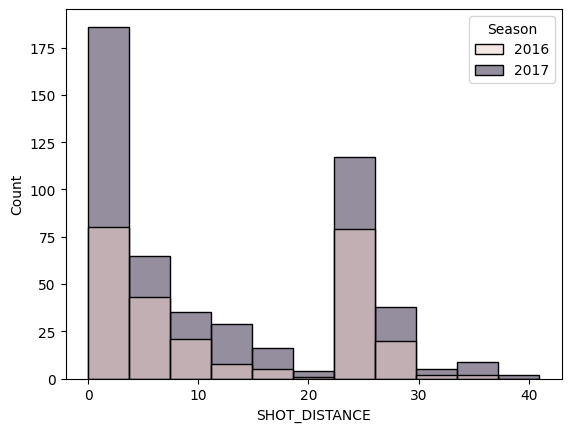

In [142]:
sns.histplot(x='SHOT_DISTANCE',data=df,hue='Season')

In [145]:
df.columns

Index(['Unnamed: 0', 'Season', 'Phase', 'Round', 'Gamecode', 'NUM_ANOT',
       'TEAM', 'ID_PLAYER', 'PLAYER', 'ID_ACTION', 'ACTION', 'POINTS',
       'COORD_X', 'COORD_Y', 'ZONE', 'FASTBREAK', 'SECOND_CHANCE',
       'POINTS_OFF_TURNOVER', 'MINUTE', 'CONSOLE', 'POINTS_A', 'POINTS_B',
       'UTC', 'SHOT_MADE_FLAG', 'SHOT_DISTANCE'],
      dtype='object')

In [159]:
bins = [0, 5, 10, 15,20,25,30,35,40]
df['SHOT_BIN'] = pd.cut(df['SHOT_DISTANCE'], bins=bins, right=False)
df['SHOT_BIN'] = df['SHOT_BIN'].apply(lambda x: f"{x.left}-{x.right}")



In [160]:
df['SHOT_BIN']

502       5-10
511      25-30
521      25-30
578        0-5
579        0-5
         ...  
78309      0-5
78314    25-30
78319      0-5
78333      0-5
78334      0-5
Name: SHOT_BIN, Length: 767, dtype: category
Categories (8, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30' < '30-35' < '35-40']

/var/folders/dc/q98d65zj19x9pb811hwrr98h0000gp/T/ipykernel_28444/547513336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data=df.groupby(['Season','SHOT_BIN'])['SHOT_MADE_FLAG'].mean().reset_index(),x='SHOT_BIN',y='SHOT_MADE_FLAG',hue='Season')


<Axes: xlabel='SHOT_BIN', ylabel='SHOT_MADE_FLAG'>

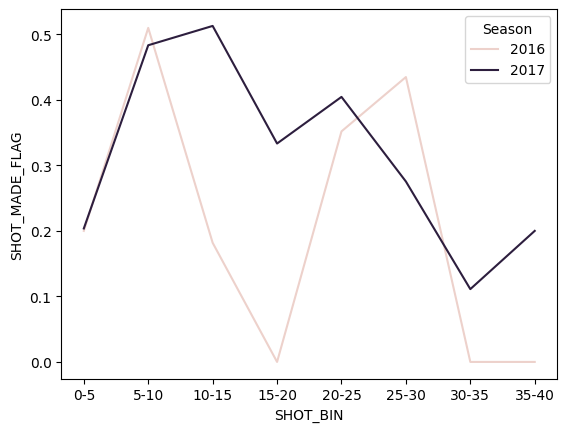

In [161]:
sns.lineplot(data=df.groupby(['Season','SHOT_BIN'])['SHOT_MADE_FLAG'].mean().reset_index(),x='SHOT_BIN',y='SHOT_MADE_FLAG',hue='Season')

<Axes: xlabel='ZONE', ylabel='FG%'>

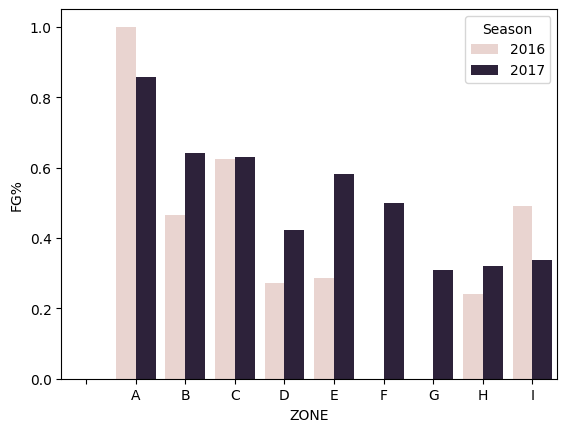

In [128]:
sns.barplot(data=df.groupby(['Season','ZONE'])['SHOT_MADE_FLAG'].mean().reset_index().rename(columns={'SHOT_MADE_FLAG':'FG%'}),x='ZONE',y='FG%',hue='Season')

In [109]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc


def draw_court(ax=None, color='black', lw=1, outer_lines=True):
    """
    FIBA basketball court dimensions:
    https://www.msfsports.com.au/basketball-court-dimensions/
    It seems like the Euroleauge API returns the shooting positions
    in resolution of 1cm x 1cm.
    """
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 45.72cm so it has a radius 45.72/2 cms
    hoop = Circle((0, 0), radius=45.72 / 2, linewidth=lw, color=color,
                  fill=False)

    # Create backboard
    backboard = Rectangle((-90, -157.5 + 120), 180, -1, linewidth=lw,
                          color=color)

    # The paint
    # Create the outer box of the paint
    outer_box = Rectangle((-490 / 2, -157.5), 490, 580, linewidth=lw,
                          color=color, fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-360 / 2, -157.5), 360, 580, linewidth=lw,
                          color=color, fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 2 * 125, 2 * 125, theta1=0, theta2=180,
                     linewidth=lw, color=color)

    # Three point line
    # Create the side 3pt lines
    corner_three_a = Rectangle((-750 + 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((750 - 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 2 * 675, 2 * 675, theta1=12, theta2=167.5,
                    linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 1400-157.5), 2 * 180, 2 * 180, theta1=180,
                           theta2=0, linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box,
                      restricted, top_free_throw, bottom_free_throw,
                      corner_three_a, corner_three_b, three_arc,
                      center_outer_arc]
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-750, -157.5), 1500, 1400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [112]:
from matplotlib import pyplot as plt
import seaborn as sns


def plot_scatter(made, miss, title=None):
    """
    Scatter plot of made and missed shots
    """
    plt.figure()
    draw_court()
    plt.plot(made['COORD_X'], made['COORD_Y'], 'o', label='Made')
    plt.plot(miss['COORD_X'], miss['COORD_Y'], 'x', markerfacecolor='none',
             label='Missed')
    plt.legend()
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return


def joint_plot(df, kind='hex', title=None):
    """
    Density plot of shots as joint distributions of x and y coordinates
    """
    cmap = plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(x=df['COORD_X'], y=df['COORD_Y'],
                                     kind='hex', space=0, color=cmap(.2),
                                     cmap=cmap, joint_kws={"gridsize": 15})

    # A joint plot has 3 Axes, the first one called ax_joint
    # is the one we want to draw our court onto
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return

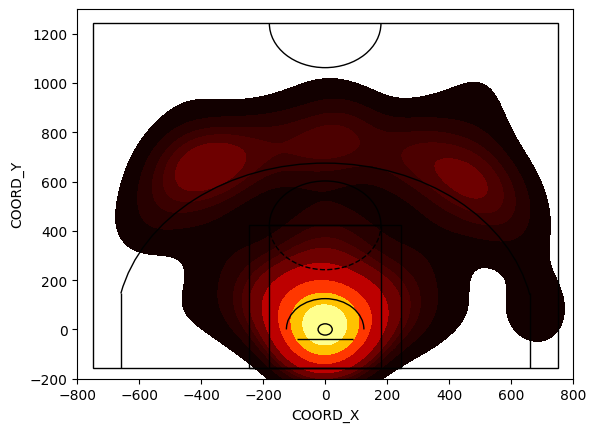

In [167]:
kdeplot = sns.kdeplot(x=df['COORD_X'], y=df['COORD_Y'],fill=True,cmap='hot')
ax = kdeplot
draw_court(ax)
plt.xlim([-800, 800])
plt.ylim([-200, 1300])
plt.show()

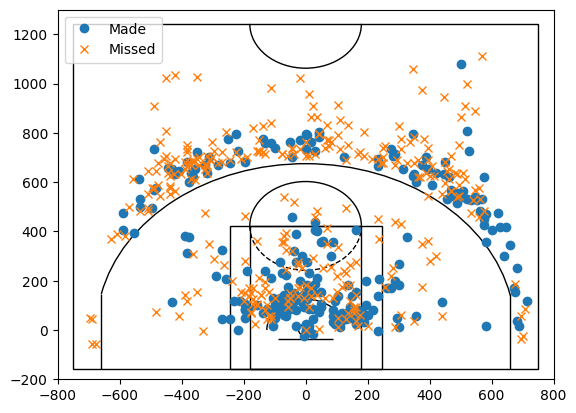

In [120]:
plot_scatter(made=df[(df['SHOT_MADE_FLAG'] == 1) & (df['ACTION'] != 'Free Throw In')],miss=df[(df['SHOT_MADE_FLAG'] == 0) & (df['ACTION'] != 'Free Throw In')])

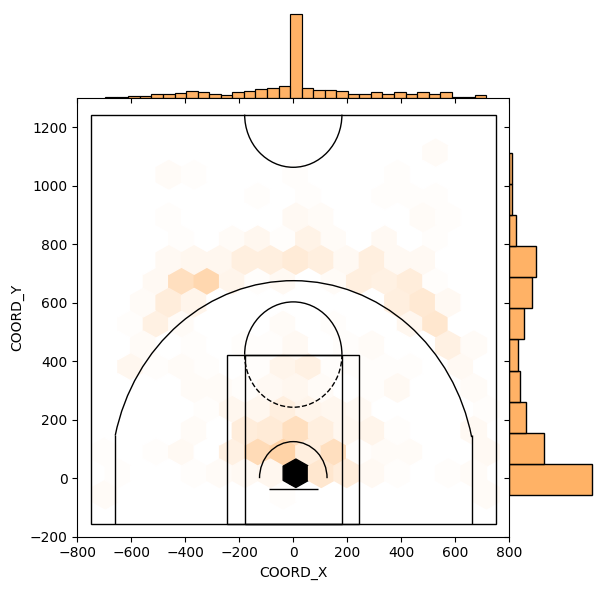

In [119]:
joint_plot(df=df)

In [132]:
df[df['FASTBREAK'] == 1].groupby('Season')['POINTS'].sum()

Season
2016    12
2017    46
Name: POINTS, dtype: int64

In [133]:
df[df['SECOND_CHANCE'] == 1].groupby('Season')['POINTS'].sum()

Season
2016    36
2017    44
Name: POINTS, dtype: int64

In [134]:
df[df['POINTS_OFF_TURNOVER'] == 1].groupby('Season')['POINTS'].sum()

Season
2016    50
2017    95
Name: POINTS, dtype: int64

In [162]:
df['SHOT_DISTANCE'].mean()

11.92812741372055